# Risk and Return Analysis

In [10]:
import numpy as np
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import math
import random
import pandas as pd

In [11]:
Stock = ['BEL.NS', 'LOVABLE.NS','SUNPHARMA.NS', 'GAIL.NS', 'HINDALCO.NS', 'WIPRO.NS', 'LAURUSLABS.NS', 'SMSPHARMA.NS']

In [12]:
tickers = [Stock[0], Stock[1], Stock[2], Stock[3], Stock[4], Stock[5], Stock[6], Stock[7],'^NSEI','^CNXPHARMA']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2020-4-1')['Adj Close']

In [13]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,BEL.NS,LOVABLE.NS,SUNPHARMA.NS,GAIL.NS,HINDALCO.NS,WIPRO.NS,LAURUSLABS.NS,SMSPHARMA.NS,^NSEI,^CNXPHARMA
Date,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,0.012950,0.008822,0.090124,0.065775,-0.031590,-0.051432,0.055432,0.027399,-0.020812,NaN
2020-04-07,-0.013674,-0.001256,0.104469,0.043538,0.157523,0.064017,0.136905,0.107520,0.084003,NaN
2020-04-08,-0.038409,0.029705,0.045321,0.012349,-0.030276,0.005198,-0.001148,0.100006,-0.004954,NaN
2020-04-09,0.054939,0.038282,0.039841,0.025391,0.064322,0.019508,0.049167,-0.002933,0.040670,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-24,-0.004770,0.088306,0.000796,0.040012,-0.001284,0.004282,0.050781,0.069645,0.001475,NaN
2021-05-25,-0.050002,0.018947,0.007426,0.022165,0.004869,0.005133,0.003302,0.048138,0.000707,NaN
2021-05-26,0.003680,0.182249,0.011001,-0.019532,-0.026420,0.018569,0.015203,-0.004361,0.006096,NaN


In [19]:
sec_returns.describe()

,BEL.NS,LOVABLE.NS,SUNPHARMA.NS,GAIL.NS,HINDALCO.NS,WIPRO.NS,LAURUSLABS.NS,SMSPHARMA.NS,^NSEI,^CNXPHARMA
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,283.000000,0.0
mean,0.002720,0.004311,0.002380,0.002596,0.005079,0.003674,0.007383,0.006352,0.002174,NaN
std,0.026319,0.041110,0.020663,0.024420,0.031680,0.022224,0.031355,0.034609,0.013639,NaN
min,-0.079802,-0.104868,-0.066009,-0.086394,-0.116344,-0.070238,-0.103476,-0.073039,-0.059161,NaN
25%,-0.012545,-0.015489,-0.010679,-0.012048,-0.012775,-0.008727,-0.010217,-0.014301,-0.004454,NaN
50%,0.001040,-0.001878,0.001948,0.001630,0.004261,0.002254,0.005119,0.000000,0.002845,NaN
75%,0.015910,0.017626,0.014244,0.017563,0.021082,0.012917,0.022157,0.018936,0.009781,NaN
max,0.087767,0.182322,0.104469,0.075499,0.157523,0.155103,0.166324,0.182322,0.084003,NaN


In [25]:
sec_returns.isna().sum()

BEL.NS             1
LOVABLE.NS         1
SUNPHARMA.NS       1
GAIL.NS            1
HINDALCO.NS        1
WIPRO.NS           1
LAURUSLABS.NS      1
SMSPHARMA.NS       1
^NSEI              3
^CNXPHARMA       286
dtype: int64

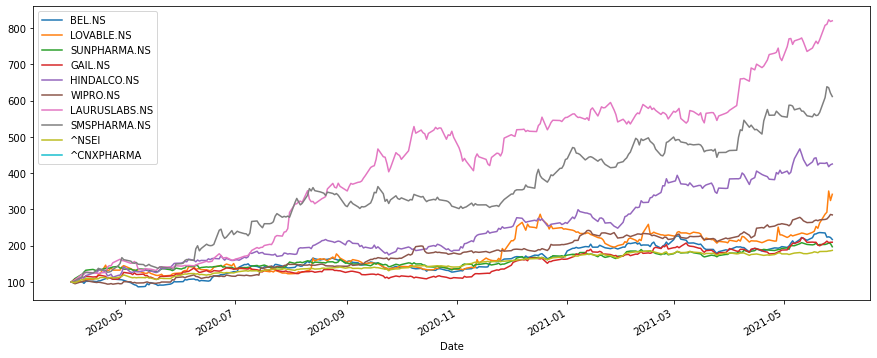

In [15]:
(sec_data / sec_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

# Return for Stock

In [16]:
sec_returns[[Stock[0],Stock[1],Stock[2],Stock[3],Stock[4],Stock[5],Stock[6],Stock[7],'^NSEI']].mean()*249*100

BEL.NS            67.716646
LOVABLE.NS       107.349924
SUNPHARMA.NS      59.251413
GAIL.NS           64.641380
HINDALCO.NS      126.465237
WIPRO.NS          91.476092
LAURUSLABS.NS    183.848744
SMSPHARMA.NS     158.172804
^NSEI             54.133619
dtype: float64

# Risk for Stock

In [17]:
Stock_risk = sec_returns[[Stock[0],Stock[1],Stock[2],Stock[3],Stock[4],Stock[5],Stock[6],Stock[7],'^NSEI']].std() * 250 ** 0.5*100
Stock_risk

BEL.NS           41.613928
LOVABLE.NS       65.001344
SUNPHARMA.NS     32.671371
GAIL.NS          38.610836
HINDALCO.NS      50.090280
WIPRO.NS         35.139821
LAURUSLABS.NS    49.577246
SMSPHARMA.NS     54.722401
^NSEI            21.565225
dtype: float64

In [18]:
Correlation = sec_returns[[Stock[0],Stock[1],Stock[2],Stock[3],Stock[4],Stock[5],Stock[6],Stock[7],'^NSEI']].corr()
Correlation

,BEL.NS,LOVABLE.NS,SUNPHARMA.NS,GAIL.NS,HINDALCO.NS,WIPRO.NS,LAURUSLABS.NS,SMSPHARMA.NS,^NSEI
BEL.NS,1.000000,0.228357,0.239626,0.363707,0.281355,0.131360,0.245559,0.185588,0.428280
LOVABLE.NS,0.228357,1.000000,0.157365,0.208736,0.220116,0.084198,0.120477,0.139393,0.285171
SUNPHARMA.NS,0.239626,0.157365,1.000000,0.290541,0.329253,0.200406,0.357142,0.354914,0.367485
GAIL.NS,0.363707,0.208736,0.290541,1.000000,0.450011,0.196450,0.175530,0.202425,0.475267
HINDALCO.NS,0.281355,0.220116,0.329253,0.450011,1.000000,0.295715,0.227245,0.196217,0.660142
WIPRO.NS,0.131360,0.084198,0.200406,0.196450,0.295715,1.000000,0.188483,0.111595,0.415400
LAURUSLABS.NS,0.245559,0.120477,0.357142,0.175530,0.227245,0.188483,1.000000,0.334892,0.291158
SMSPHARMA.NS,0.185588,0.139393,0.354914,0.202425,0.196217,0.111595,0.334892,1.000000,0.248733
^NSEI,0.428280,0.285171,0.367485,0.475267,0.660142,0.415400,0.291158,0.248733,1.000000
